In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
#Loading the dataset
data_df=pd.read_csv("C:/Users/ASUS/Downloads/creditcard.csv")

In [3]:
#Having a glance at the first five rows of the dataset
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Finding the number of rows and columns in the dataset
data_df.shape

(284807, 31)

In [5]:
#Visualizing the basic information statistically
data_df[["Amount","Time","Class"]].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [6]:
#Analysing the columns present in the dataset
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
#Checking whether there is any null values present in the dataset
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [8]:
#Finding the frequency and percentage of null values in each columns
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No. null values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [9]:
null_columns

,Columns,No. null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [10]:
data_df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

In [11]:
#Finding the percentage of total genuine transactions
gcount=0
genuine=data_df['Class']
for i in range(len(genuine)):
    if genuine[i]==0:
        gcount=gcount+1

per_g=(gcount/len(genuine))*100
print("Percentage of total genuine transactions in the dataset=",per_g, "%")

Percentage of total genuine transactions in the dataset= 99.82725143693798 %


In [12]:
#Finding the percentage of total fraud transactions
fcount=0
fraud=data_df['Class']
for i in range(len(fraud)):
    if fraud[i]==1:
        fcount=fcount+1

per_f=(fcount/len(fraud))*100
print("Percentage of total fraud transactions in the dataset=",per_f, "%")

Percentage of total fraud transactions in the dataset= 0.1727485630620034 %


In [13]:
#Creating a data set to plot the graph to visualize the genuine and fraud transactions
plot_data=pd.DataFrame()
plot_data["Fraud Transaction"]=fraud
plot_data["Genuine Transaction"]=genuine
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


<Axes: title={'center': 'Bar plot for Genuine Transactions vs Fraud Transactions'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

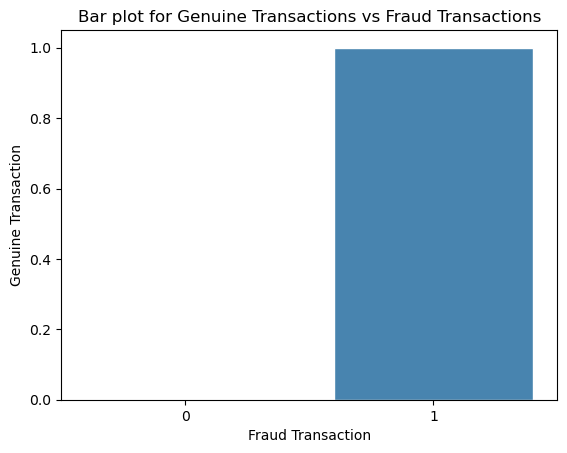

In [14]:
#PLotting the graph to visualize the genuine and fraud transactions
plt.title("Bar plot for Genuine Transactions vs Fraud Transactions")
sns.barplot(x="Fraud Transaction", y="Genuine Transaction", data=plot_data, palette="Blues",edgecolor="w")

Text(0.5, 1.0, 'Amount vs Time')

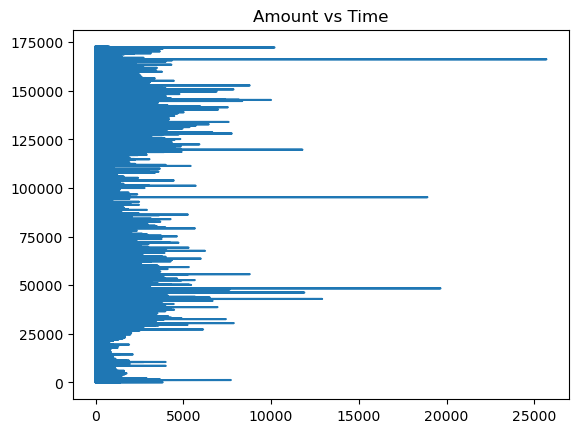

In [15]:
#Plotting the relation between amount and time in the dataset
x=data_df["Amount"]
y=data_df["Time"]
plt.plot(x,y)
plt.title("Amount vs Time")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2409756262.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df["Amount"],color="green")


<Axes: title={'center': 'Amount Distribution'}, xlabel='Amount', ylabel='Density'>

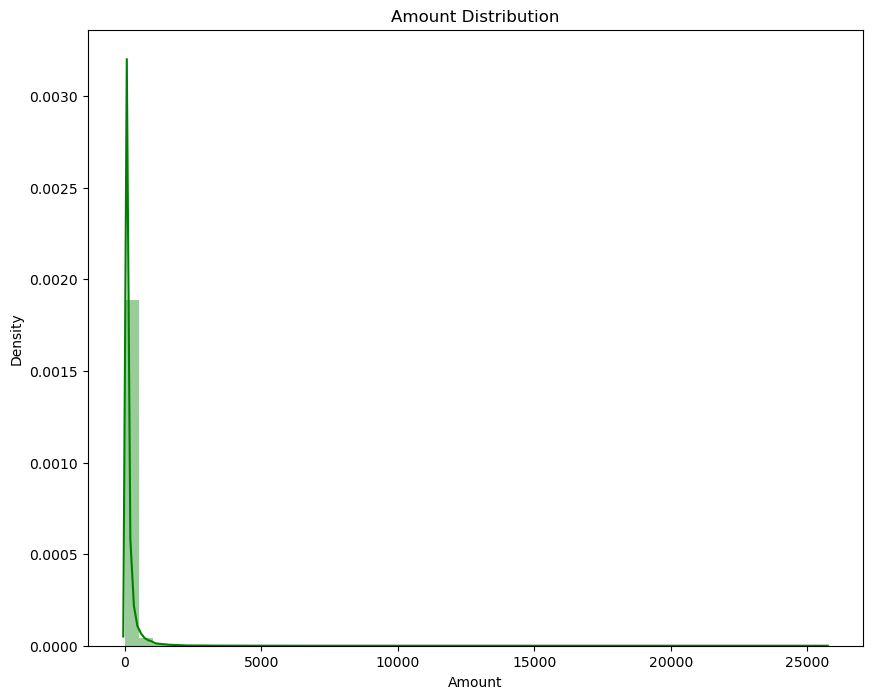

In [16]:
#Visulizing the amount distribution
plt.figure(figsize=(10,8))
plt.title("Amount Distribution")
sns.distplot(data_df["Amount"],color="green")

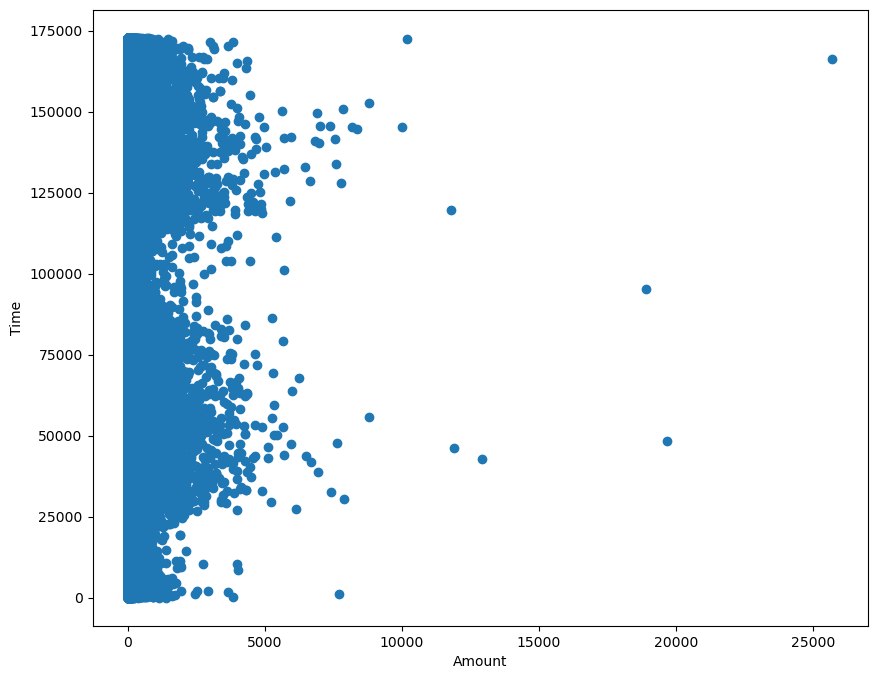

In [17]:
#Finding the outliers in the data
fig, ax=plt.subplots(figsize=(10,8))
ax.scatter(data_df["Amount"],data_df["Time"])
ax.set_xlabel("Amount")
ax.set_ylabel("Time")
plt.show()

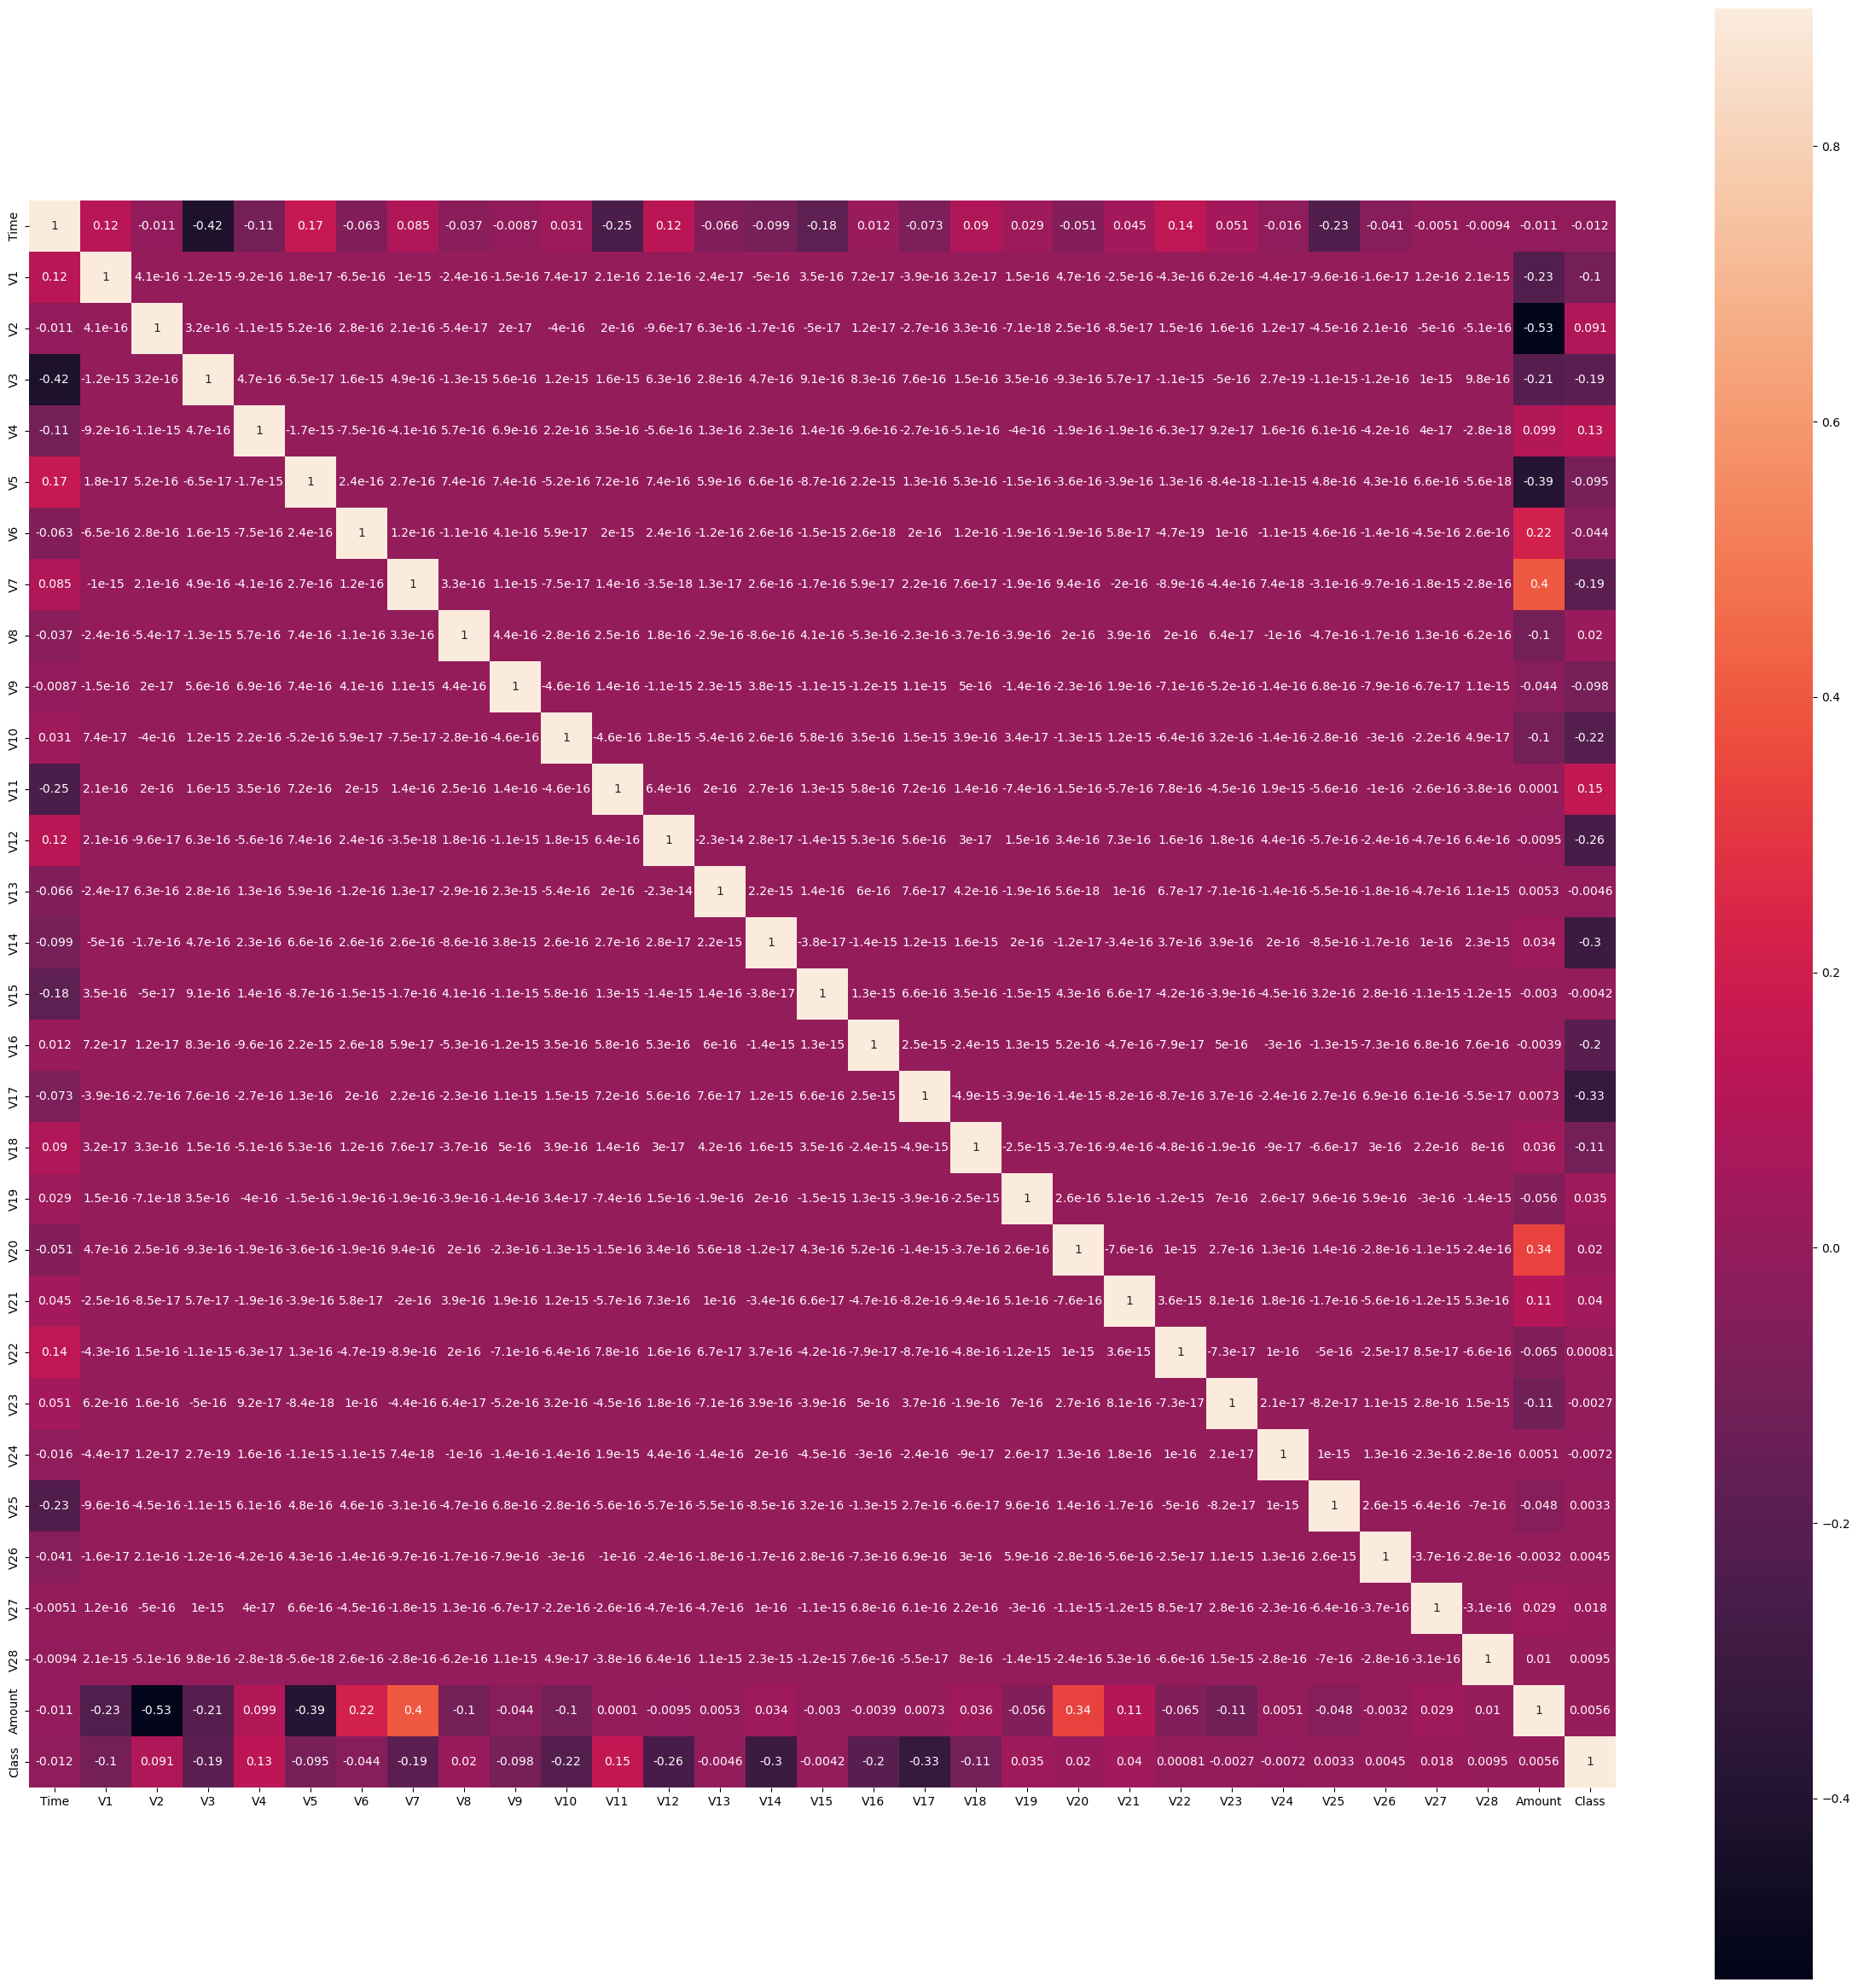

In [18]:
#Having a glance at the correlation matrix
correlation_matrix=data_df.corr()
fig=plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix,vmax=0.9,annot=True,square=True)
plt.show()

In [19]:
#Creating the model
x=data_df.drop(["Class"],axis=1)
y=data_df["Class"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
#Calling Logistic Regression
logisticreg=LogisticRegression()
logisticreg.fit(xtrain,ytrain)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
#Predicting the data
ypredict=logisticreg.predict(xtest)
accuracy=logisticreg.score(xtest,ytest)

In [22]:
xtest

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,56223.0,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,...,-0.316016,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,75.69
252263,155726.0,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,...,-0.127503,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,9.99
221246,142491.0,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,...,-0.008625,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,7.63
81910,59157.0,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,...,0.424562,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,3.59


In [23]:
ypredict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
ytest

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
75723     0
252263    0
221246    0
81910     0
59490     0
Name: Class, Length: 56962, dtype: int64

In [25]:
#Finding the accuracy of the matrix
print("Accuracy score of the Logistic Regression Model =",accuracy*100,"%")

Accuracy score of the Logistic Regression Model = 99.87184438748639 %


In [26]:
#Fnding the confusion matrix
cm=metrics.confusion_matrix(ytest,ypredict)
print(cm)

[[56833    31]
 [   42    56]]
